<h4>Import Libraries</h4>

In [35]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn                 import datasets
from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model    import LinearRegression, RidgeCV, Ridge, ElasticNet, ElasticNetCV , Lasso
from sklearn.metrics         import mean_squared_error, euclidean_distances
from sklearn.neighbors       import KNeighborsRegressor

<h5>Some Housing Params</h5>

In [4]:
params = {
    'legend.fontsize'    : 'small',
    'figure.figsize'     : (15,5),
    'axes.labelsize'     : 'medium',
    'axes.titlesize'     : 'large',
    'xtick.labelsize'    : 'medium',
    'ytick.labelsize'    : 'medium',
    'savefig.dpi'        : 75,
    'image.interpolation': 'none',
    'savefig.bbox'       : 'tight',
    'lines.linewidth'    : 1,
    'legend.numpoints'   : 1,
}

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

NOISE     = 0.1
N_SAMPLES = 1000
ALPHA     = 0.001
TEST_SIZE = 0.2

<Figure size 1500x500 with 0 Axes>

<h4>Fake Data</h4>

In [6]:
#sample generation
def fn_make_wave(n_sample= 100):

    rnd = np.random.RandomState(RANDOM_STATE)

    x   = rnd.uniform(-3, 3, size = n_sample)

    y_no_noise = (np.sin(4 * x)+ x)

    y = y_no_noise + rnd.normal(size = len(x)) /2.0

    return x.reshape(-1, 1), y

In [7]:
n_neighbor = 3

X, y = fn_make_wave(n_sample= 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=RANDOM_STATE,
                                                    test_size=4)

dist = euclidean_distances(X_train, X_test)

closest = np.argsort(dist, axis = 0)

# closest

In [8]:
reg = KNeighborsRegressor(n_neighbors=n_neighbor)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

y_pred

array([ 1.30134024,  2.60157104,  1.6187098 , -2.49320697])

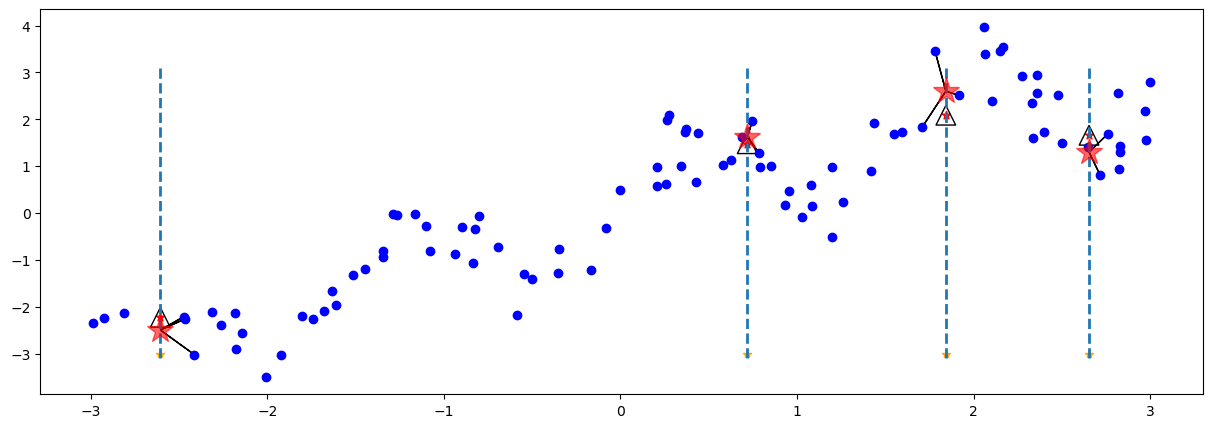

In [9]:
fig, ax = plt.subplots()
train, =  ax.plot(X_train, y_train, 'o', c= 'b')

test, =  ax.plot(X_test, -3 *np.ones(len(X_test)), '*', c= 'orange')

ax.vlines(X_test, -3.1,3.1, linestyles= '--', linewidth = 2)

ax.scatter(X_test[:,0], y_test, edgecolors='r', facecolor = 'r', marker='*')

ax.scatter(X_test[:,0], y_test, edgecolors='k', facecolor = 'none', marker='^', s = 200)

pred, = ax.plot(X_test, y_pred, '*', c= 'r', markersize = 20, alpha = 0.6) 

for x,y_ , neighbors in zip(X_test, y_pred, closest.T):
    for neighbor in neighbors[: n_neighbor]:
        plt.arrow(x[0], y_,
                 X_train[neighbor, 0] -x[0],
                 y_train[neighbor]-y_,
                 head_width = 0, ec= 'k', fc = 'k')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=RANDOM_STATE,
                                                    test_size=4)

for n_neighbor in np.arange(1,11):

    reg = KNeighborsRegressor(n_neighbors=n_neighbor)

    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test);

    print(f'for Neighbors : {n_neighbor}R^2 = {reg.score(X_test, y_test) : 0.4f}');


for Neighbors : 1R^2 =  0.8168
for Neighbors : 2R^2 =  0.8990
for Neighbors : 3R^2 =  0.9595
for Neighbors : 4R^2 =  0.9281
for Neighbors : 5R^2 =  0.9232
for Neighbors : 6R^2 =  0.9505
for Neighbors : 7R^2 =  0.9553
for Neighbors : 8R^2 =  0.9655
for Neighbors : 9R^2 =  0.9521
for Neighbors : 10R^2 =  0.9459


<h4>Linear Regression</h4>

In [15]:
#sample generation
def fn_generate_lin_data():
    start = -1.0
    end   = 2.0
    delta = 0.05

    X = np.arange(start,end,delta)

    y_rand  = np.random.rand(X.shape[0])
    y_train = 2*X + y_rand 
    y_test = (2-y_rand) *X + y_rand
    
   

    return X, X, y_train, y_test

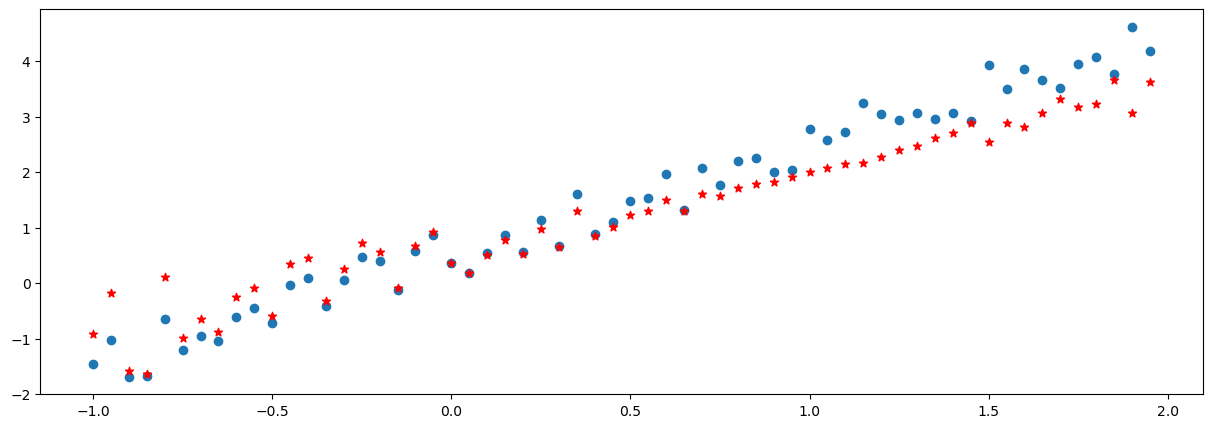

In [17]:
X_train, X_test, y_train, y_test = fn_generate_lin_data()
fig , ax= plt.subplots()
ax.scatter(X_train, y_train)
ax.scatter(X_test, y_test, c='r', marker='*')

In [19]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train)

lr.coef_, lr.intercept_

(array([1.95686217]), 0.49230931576813086)

<h4>Ridge Regression</h4>

In [22]:
ridge = Ridge(alpha=10)

ridge.fit(X_train.reshape(-1, 1), y_train)
ridge.coef_, ridge.intercept_

(array([1.60098817]), 0.6613494672109189)

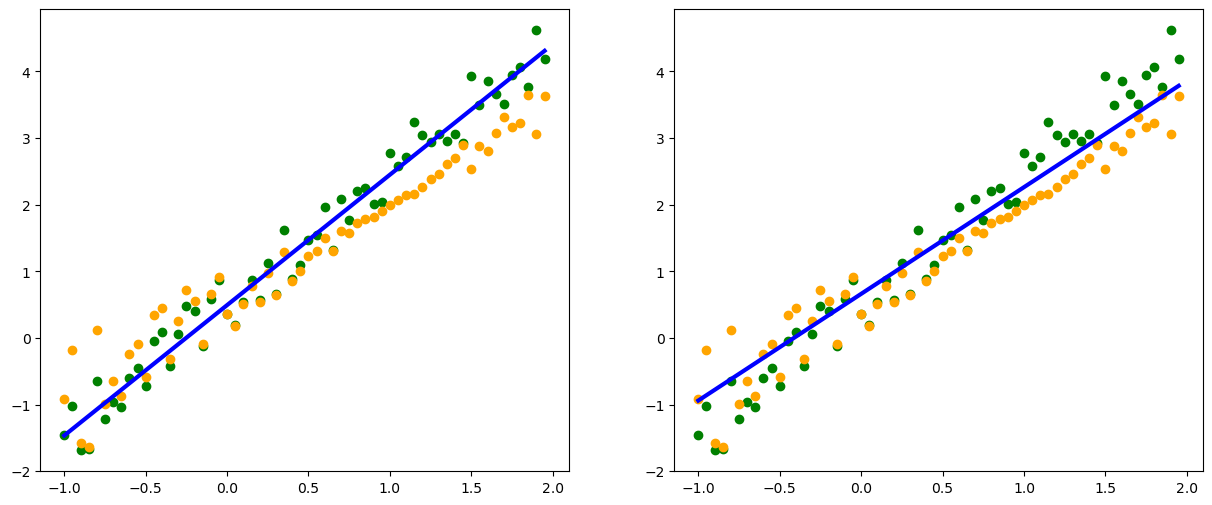

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

colors = CMAP(np.linspace(0, 1, 4))

ax = axes[0]

y_pred = lr.predict(X_test.reshape(-1,1))
ax.plot(X_test, y_pred, color='b', lw=3)
ax.scatter(X_train, y_train, color = 'g')
ax.scatter(X_test, y_test, color = 'orange')

ax = axes[1]

y_pred = ridge.predict(X_test.reshape(-1,1))
ax.plot(X_test, y_pred, color='b', lw=3)
ax.scatter(X_train, y_train, color = 'g')


ax.scatter(X_test, y_test, color = 'orange')

In [31]:
lr.score(X_test.reshape(-1,1), y_test)

0.8439946952192757

In [33]:
ridge.score(X_test.reshape(-1,1 ), y_test)

0.9236293276162023

<h4>Lasso</h4>

In [44]:
lasso = Lasso(alpha = 0.1, max_iter=100_000)

lasso.fit(X_train.reshape(-1, 1), y_train)
lasso.coef_, lasso.intercept_

(array([1.82349179]), 0.555660246582246)

In [46]:
lasso.score(X_test.reshape(-1, 1), y_test)

0.8861745676035295

<h4>ElasticNet</h4>

In [51]:
elasti = ElasticNet(random_state=RANDOM_STATE)

elasti.fit(X_train.reshape(-1, 1), y_train)
elasti.coef_, elasti.intercept_

(array([0.77392015]), 1.054206778443656)

In [53]:
elasti.score(X_test.reshape(-1, 1), y_test)

0.7020186155107178